## Phenotypic Phase Plane

Adapted from D. Bavnhøj

This notebook contains a Phenotypic Phase Plane analysis of the <i>Geobacillus</i> Acetone-producing model.

Phenotypic Phase Planes (PPP) are a modeling approach to model a production envelope, which visualizes the tradeoff between a product of interest and cellular growth.

In [1]:
from cobra.io import read_sbml_model
from cameo import phenotypic_phase_plane
import matplotlib.pyplot as plt
from os.path import dirname, join, pardir
import pandas as pd

Reading the <i>Geobacillus</i> acetone model.

In [2]:
data_dir = "/Users/phivri/Documents/GitHub/MoGeoModel"
model = read_sbml_model(join(data_dir,'Models/p-thermo_acetone_anaerobic.xml'))

Using license file /Users/phivri/gurobi.lic
Academic license - for non-commercial use only - expires 2022-07-23


First, I will try with the initial conditions given in the model, but constrainting the oxygen exchange

In [3]:
medium = model.medium
medium["EX_o2_e"] = 1000.0
medium["EX_ac_e"] = 10.0
medium["EX_sucr_e"] = 0.0
medium["EX_glc__D_e"] = 0.0
model.medium = medium

model.medium

{'EX_cl_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_ac_e': 10.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_btn_e': 1.0,
 'EX_thmpp_e': 1.0,
 'EX_sprm_e': 1.0,
 'EX_spmd_e': 1.0,
 'EX_adocbl_e': 1.0,
 'EX_10fthf_e': 1.0,
 'EX_fe3_e': 1.0,
 'EX_pheme_e': 1.0}

In [4]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
10fthf_e,EX_10fthf_e,4.711E-05,20,0.00%
ac_e,EX_ac_e,10,2,99.95%
adocbl_e,EX_adocbl_e,2.626E-05,72,0.01%
btn_e,EX_btn_e,2.356E-07,10,0.00%
ca2_e,EX_ca2_e,0.000371,0,0.00%
fe2_e,EX_fe2_e,2.626E-05,0,0.00%
fe3_e,EX_fe3_e,0.004005,0,0.00%
h_e,EX_h_e,9.046,0,0.00%
k_e,EX_k_e,0.08341,0,0.00%
mg2_e,EX_mg2_e,0.01154,0,0.00%


In [5]:
result = phenotypic_phase_plane(model,
                                variables=[model.reactions.biomass],
                                objective=model.reactions.EX_act_e)

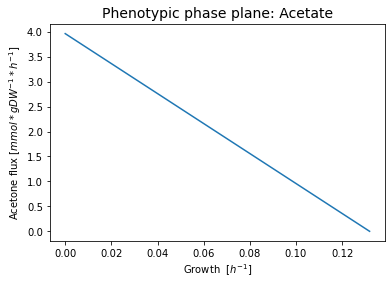

In [6]:
result = result.data_frame
growth_glu = result["biomass"]
product_glu = result["objective_upper_bound"]

plt.title("Phenotypic phase plane: Acetate", size = 14)
plt.xlabel("Growth  [$h^{-1}$]")
plt.ylabel("Acetone flux [$mmol*gDW^{-1}*h^{-1}$]")
plt.plot(growth_glu, product_glu)

In [8]:
growth_glu,product_glu

(0     0.000000
 1     0.006943
 2     0.013886
 3     0.020828
 4     0.027771
 5     0.034714
 6     0.041657
 7     0.048600
 8     0.055542
 9     0.062485
 10    0.069428
 11    0.076371
 12    0.083314
 13    0.090256
 14    0.097199
 15    0.104142
 16    0.111085
 17    0.118027
 18    0.124970
 19    0.131913
 Name: biomass, dtype: float64,
 0     3.961854
 1     3.753335
 2     3.544816
 3     3.336298
 4     3.127779
 5     2.919261
 6     2.710742
 7     2.502223
 8     2.293705
 9     2.085186
 10    1.876668
 11    1.668149
 12    1.459630
 13    1.251112
 14    1.042593
 15    0.834074
 16    0.625556
 17    0.417037
 18    0.208519
 19    0.000000
 Name: objective_upper_bound, dtype: float64)

The plot above shows, cellular growth and the acetone flux. Decreasing celullar growth (towards 0 on the x axis) increases the flux of acetone.